<a href="https://colab.research.google.com/github/Cristiancperez/Code_in_class/blob/main/04_%2C_DS_and_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Data Structure and Pandas**

`numpy` is for vector and matrices (`arrays`).

`pandas`is a library to work with databases (data with relations and conextions). In practical terms, `pandas` is the Excel of Python.

To make clear you can work with `numpy` and `pandas` at the same time.

In [7]:
import pandas as pd
import numpy as np

# **2. Pandas series**

A series (in panda) is a one-dimensional object.

## 2.1 Series creation

In [2]:
# Empty series

s_empty = pd.Series()
print(s_empty)

Series([], dtype: float64)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
# Creating a Series - typing the values 
## int values

s_int = pd.Series([1,2,3,4,5,6,7])
print(s_int)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
dtype: int64


In [4]:
# Creating a Series - using random numbers
## float values

s_num = pd.Series(np.random.rand(8))
print(s_num)

0    0.536913
1    0.744199
2    0.085923
3    0.730548
4    0.709494
5    0.678961
6    0.981541
7    0.078760
dtype: float64


# 4. Practical case


## 4.1 Similation

Asimulation is a *model* to replicate an event.

One of the key terms is **paths** of the simulation.

## 4.2. Creating the simulation

A simulation of the price of a financial asset.

To do this, we need:

* First, create the dates:

In [8]:
# Daily dates from 2021 to update

## This line saves the current date with a given format
td = pd.to_datetime("today").strftime("%m/%d/%Y")

## Create the date range

dr = pd.date_range(start = "01/01/2021", end = td)

## Number of dates

nd =len(dr)

* Second, simulate the price (do not worry about the formula)

In [28]:
# Price with returns ~ N(mu, sigma^2)

## Create the returns

mu = 0.001; sigma = 0.01
r  = np.random.normal(mu, sigma, size = nd)

## Create the price

S1 = np.empty(nd)
S1[0] = 100       # initial price

for i in range(1,nd):
  S1[i] = S1[i-1]*np.exp(r[i])

* Convert S1 to a time-series object:

In [39]:
# Convert S1

S1 = pd.Series(S1, index = dr)
S1.head(5)

2021-01-01    100.000000
2021-01-02     99.054237
2021-01-03     98.976115
2021-01-04     97.880241
2021-01-05     96.847319
Freq: D, dtype: float64

* One thing to do with data is to explore:

In [40]:
#This a library to graphic
import matplotlib.pyplot as plt



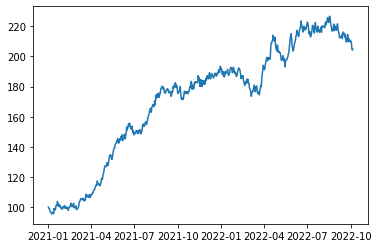

In [41]:
plt.plot(S1)
plt.show()

So, we are going to use `plotly`

In [42]:
# Import library

import plotly.express as px

In [43]:
fig = px.line(S1, title = "Financial Asset")
fig.show()

* This graph is better, but we can **pimp it up:**

In [45]:
fig = px.line(S1).update_layout(showlegend = False)

# Title
fig.update_layout(title = "Financial Asset",
                  title_font_size = 30,
                  title_x = 0.5)

# Axis
fig.update_xaxes(title = "Dates", title_font_size = 20)
fig.update_yaxes(title = "Price", title_font_size = 20)
fig.show()

In [46]:
fig = px.line(S1).update_layout(showlegend = False)

# Title
fig.update_layout(title = "Financial Asset",
                  title_font_size = 30,
                  title_x = 0.5)

# Axis
fig.update_xaxes(title = "Dates", title_font_size = 20,
                 dtick = "M1",
                 tickformat = "%b\n%Y")
fig.update_yaxes(title = "Price", title_font_size = 20)
fig.show()

## 4.3. Basic Stadistics 



In [51]:
# Very (very) basic info
print('Basic Stadistics:')
print('Obs: \t', S1.size)
print('Minimum:', round(S1.min(),2))
print('Mean:\t', round(S1.mean(),2))
print('Maximum:', round(S1.max(),2))



Basic Stadistics:
Obs: 	 643
Minimum: 95.44
Mean:	 171.04
Maximum: 226.68


### Add info to the graph

In [64]:
fig = px.line(S1).update_layout(showlegend = False)

# Title
fig.update_layout(title = "Financial Asset",
                  title_font_size = 30,
                  title_x = 0.5)

# Axis
fig.update_xaxes(title = "Dates", title_font_size = 20,
                 dtick = "M1",
                 tickformat = "%b\n%Y")
fig.update_yaxes(title = "Price", title_font_size = 20)

# Text box
fig.add_annotation(x = '2021-02-01', y = 0.85*S1.max(),
                   text  = '<b> Basic Statistics: </b> <br>'
                            f'Obs: {S1.size}'
                   align = 'left',
                   showarrow = False,)

                   

fig.show()

SyntaxError: ignored